In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

In [2]:
#首先是一系列训练数据，使用numpy来存储
#即一些的点作为线性回归的数据
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
 
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [3]:
# 将numpy形式转换为tenor
x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)

In [6]:
# 定义线性回归模型
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression()    

#这里的nn.Linear表示的是 y=w*x+b，里面的两个参数都是1，表示的是x是1维，y也是1维。

In [7]:
# 定义 loss 和优化函数
# 定义loss和优化函数
# 使用的是最小二乘loss
# 优化函数为随机梯度下降
# 将model的参数model.parameters()传进去让这个函数知道他要优化的参数是那些
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [8]:
# 开始训练
# 第一个for循环表示每个epoch，接着开始前向传播，然后计算loss，然后反向传播，接着优化参数，
#特别注意的是在每次反向传播的时候需要将参数的梯度归零

num_epochs = 1000
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)  #前向传播
    loss = criterion(out, target) #计算loss
    # backward
    optimizer.zero_grad() #梯度归零
    loss.backward()  #反向传播
    optimizer.step() #更新参数

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')


Epoch[20/1000], loss: 10.712464
Epoch[40/1000], loss: 7.622754
Epoch[60/1000], loss: 5.439115
Epoch[80/1000], loss: 3.895837
Epoch[100/1000], loss: 2.805131
Epoch[120/1000], loss: 2.034278
Epoch[140/1000], loss: 1.489480
Epoch[160/1000], loss: 1.104445
Epoch[180/1000], loss: 0.832321
Epoch[200/1000], loss: 0.639996
Epoch[220/1000], loss: 0.504069
Epoch[240/1000], loss: 0.408002
Epoch[260/1000], loss: 0.340104
Epoch[280/1000], loss: 0.292115
Epoch[300/1000], loss: 0.258197
Epoch[320/1000], loss: 0.234224
Epoch[340/1000], loss: 0.217278
Epoch[360/1000], loss: 0.205300
Epoch[380/1000], loss: 0.196831
Epoch[400/1000], loss: 0.190845
Epoch[420/1000], loss: 0.186611
Epoch[440/1000], loss: 0.183617
Epoch[460/1000], loss: 0.181498
Epoch[480/1000], loss: 0.179999
Epoch[500/1000], loss: 0.178937
Epoch[520/1000], loss: 0.178184
Epoch[540/1000], loss: 0.177650
Epoch[560/1000], loss: 0.177270
Epoch[580/1000], loss: 0.176999
Epoch[600/1000], loss: 0.176806
Epoch[620/1000], loss: 0.176667
Epoch[640/1

In [9]:
# 测试模型
model.eval()  #让model变成测试模式，这主要是对dropout和batch normalization的操作在训练和测试的时候是不一样的
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

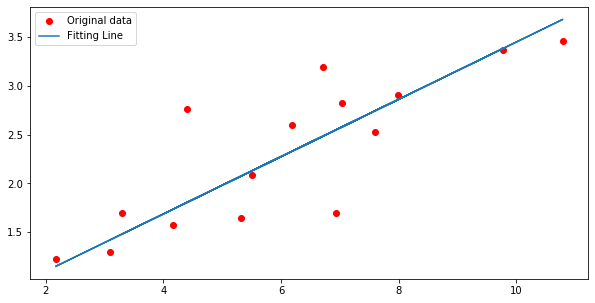

In [10]:
# matlab 显示测试结果
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

In [11]:
# 保存模型
torch.save(model.state_dict(), './linear.pth')